In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

In [ ]:
df[np.isnan(df['TotalCharges'])]

In [ ]:
df[df['tenure']==0]

In [ ]:
df.drop(labels = df[df['tenure']==0].index, axis=0,inplace=True)
df.fillna(df["TotalCharges"].mean())

df.isnull().sum()

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
c_list = df['Churn'].value_counts()
plt.pie(c_list,labels = c_list.index,shadow=True,autopct='%.1f%%' )
plt.title('Churn')
plt.show()

In [ ]:
G_list = df['gender'].value_counts()
plt.pie(G_list,labels = G_list.index,shadow=True,autopct='%.1f%%' )
plt.title('gender')
plt.show()

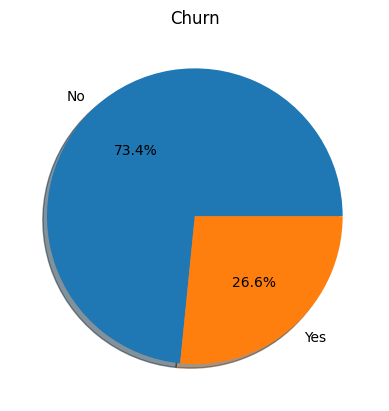

In [ ]:
sns.countplot(data = df , x ='gender', hue = 'Churn')
plt.title("Gender vs Churn")
plt.show()


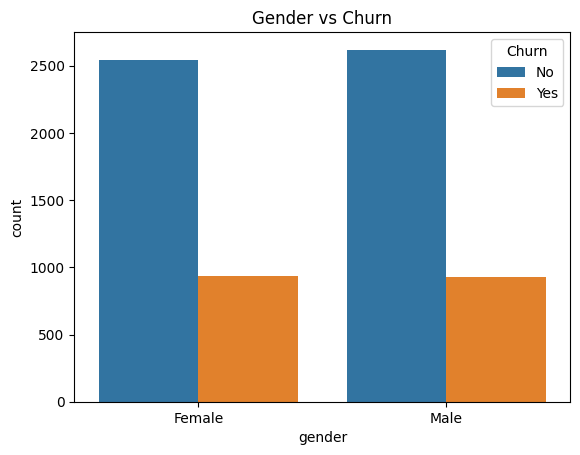

In [ ]:
gender_C=df.groupby(['gender','Churn'])['Churn'].size().unstack().fillna(0)
gender_C["%"] = [939/(2544+939)*100 , 930/(2619+930)*100]
gender_C

性別對續約與否影響不大

In [ ]:
p_list = df['PaymentMethod'].value_counts()
plt.pie(p_list,labels = p_list.index,shadow=True,autopct='%.1f%%' )
plt.title('PaymentMethod')
plt.show()


In [ ]:
fig = px.histogram(df, x="Churn" , color='PaymentMethod' ,title='Payment Method distribution')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
PaymentMethod_c=df.groupby(['PaymentMethod','Churn'])['Churn'].size().unstack().fillna(0)
PaymentMethod_c

使用電子支票的客戶較容易不續約

In [ ]:
fig = px.histogram(df, x="Churn" , color='PaperlessBilling' ,title='PaperlessBilling distribution')
fig.update_layout(width=600, height=500, bargap=0.1)
fig.show()

In [ ]:
PaperlessBilling_c=df.groupby(['PaperlessBilling','Churn'])['Churn'].size().unstack().fillna(0)
PaperlessBilling_c['%'] = [469/(2395+469)*100 , 1400/(2768+1400)*100]
PaperlessBilling_c

使用紙本帳單的流失率比非使用紙本帳單多了快一倍

In [ ]:
PaperlessBilling_cp=df.groupby(['PaperlessBilling','PaymentMethod','Churn'])['Churn'].size().unstack().fillna(0)
PaperlessBilling_cp

使用紙本帳單和電子支票支付的客戶最容易流失

In [ ]:
CT_list = df['Contract'].value_counts()
plt.pie(CT_list,labels = CT_list.index,shadow=True,autopct='%.1f%%' )
plt.title('Contract')
plt.show()


In [ ]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="Customer contract distribution")
fig.update_layout(width=700, height=500, bargap=0.3)
fig.show()

In [ ]:
Contract_C=df.groupby(['Contract','Churn'])['Churn'].size().unstack().fillna(0)
Contract_C['%']=[42.7,11.2,2.84]
Contract_C

In [ ]:
print("Month-to-month客戶跳出合約比率:%f"  %(1655/(2220+1655)*100))
print("One-year客戶跳出合約比率:%f"  %(166/(1306+166)*100))
print("Two-year客戶跳出合約比率:%f"  %(48/(1637+48)*100))

In [ ]:
fig = px.histogram(df, x="Churn", color="InternetService", barmode="group", title="InternetService distribution")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [ ]:
Inter_C=df.groupby(['InternetService','Churn'])['Churn'].size().unstack().fillna(0)
Inter_C['%'] = [459/(1957+459)*100 , 1297/(1799+1297)*100 ,0]
Inter_C

很多客戶使用Fiber optic，卻較容易跳出合約(41.8%)，猜測可能對此服務不滿
相較使用DSL客戶最多，流失最少

In [ ]:
plt.figure(figsize=(6,5))
sns.boxplot(data = df , x=df['Churn'] , y=df['tenure'])
plt.title("tenure vs Churn")
plt.show()

In [ ]:
t_c_0 = df.groupby('Churn').get_group('No')['tenure'].describe()
t_c_1 = df.groupby('Churn').get_group('Yes')['tenure'].describe()
t_c = pd.concat([t_c_0,t_c_1],axis=1)
t_c.columns = ['No',"Yes"]
t_c

In [ ]:
#tenure_no = df.groupby('Churn').get_group(0).describe()['tenure']
#tenure_yes = df.groupby('Churn').get_group(1).describe()['tenure']

In [ ]:
# Figure size
plt.figure(figsize=(7,4))

# Histogram
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn',shade= True)

# Aesthetics
plt.title('MonthlyCharges distribution')
plt.xlabel('MonthlyCharges')

In [ ]:
t_c_0_m = df.groupby('Churn').get_group('No')['MonthlyCharges'].describe()
t_c_1_m = df.groupby('Churn').get_group('Yes')['MonthlyCharges'].describe()
t_c_m = pd.concat([t_c_0_m,t_c_1_m],axis=1)
t_c_m.columns = ['No',"Yes"]
t_c_m

In [ ]:
plt.figure(figsize=(7,4))

# Histogram
sns.kdeplot(data=df, x='TotalCharges', hue='Churn',shade= True)

# Aesthetics
plt.title('TotalCharges distribution')
plt.xlabel('TotalCharges')

In [ ]:
t_c_0_T = df.groupby('Churn').get_group('No')['TotalCharges'].describe()
t_c_1_T = df.groupby('Churn').get_group('Yes')['TotalCharges'].describe()
t_c_T = pd.concat([t_c_0_T,t_c_1_T],axis=1)
t_c_T.columns = ['No',"Yes"]
t_c_T

In [ ]:
#plt.figure()
#sns.jointplot(x=df['gender'], y=df['MonthlyCharges'], hue=df["Churn"],kind="kde", shade=False)
#plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.drop(columns = 'customerID' ,inplace = True)
df

In [ ]:
df_corr = df.corr()
df_corr['Churn'].sort_values(ascending = False)
plt.figure(figsize=(16,10))
mask = np.triu(np.ones_like(df_corr, dtype=bool))
sns.heatmap(df_corr,mask=mask,annot=True ,cmap='coolwarm',linewidths=.2)

In [ ]:
df_corr['Churn'].sort_values(ascending=False)

In [ ]:
col_num=["tenure", 'MonthlyCharges', 'TotalCharges']
for i in col_num:
    plt.figure()
    sns.kdeplot(data=df, x=df[i],shade= True)
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

X = df.drop(columns = ['Churn'])
y = df['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print('oob_score =' , model_rf.oob_score_)
print ("accuracy_score=",metrics.accuracy_score(y_test, prediction_test))

In [ ]:
feat_importances_rfr = pd.Series(model_rf.feature_importances_, index= X_train.columns)
feat_importances_rfr.sort_values(ascending=True).plot(kind='barh')
